In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras import optimizers,utils
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from random import shuffle
import cv2
import imageio
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
# import the module
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from numpy import argmax
from sklearn.metrics import r2_score
import tensorflow as tf
import numpy as np # linear algebra
from sklearn.metrics import r2_score

# classification mlp model for the abalone dataset
from numpy import unique
from numpy import argmax
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import imageio
import os
import seaborn as sns
from PIL import Image
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential

from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
import math  

from tensorflow.keras.utils import plot_model

In [2]:
# changing dir and loading images in the folder

filepath = "C:\\Users\\CyberOps\\balanceface"
os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)

3420

3420
28: 190
16: 190
13: 190
25: 190
29: 190
27: 190
14: 190
24: 190
22: 190
17: 190
20: 190
21: 190
15: 190
19: 190
18: 190
26: 190
23: 190
30: 190


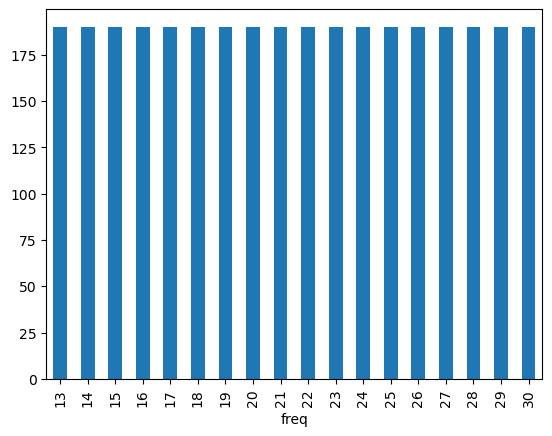

freq
0   28
1   28
2   16
3   13
4   25

In [3]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [4]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

C:\Users\CyberOps\AppData\Local\Temp\ipykernel_29452\2699070946.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ages = pd.Series(ages, name='Age').astype(np.int)


In [5]:
df.head()


freq
0   28
1   28
2   16
3   13
4   25

Age: 18


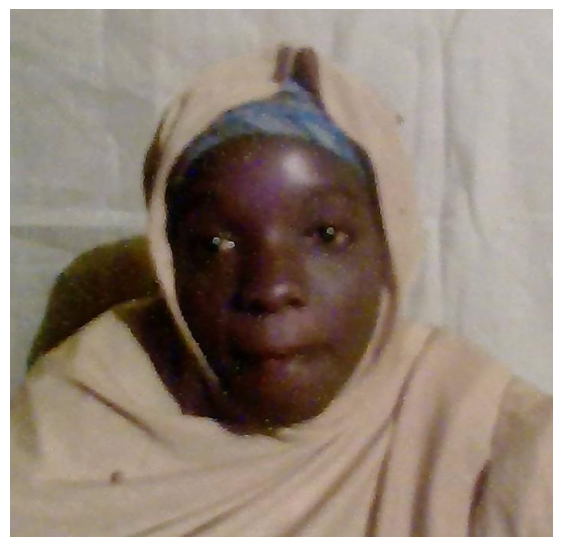

In [8]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

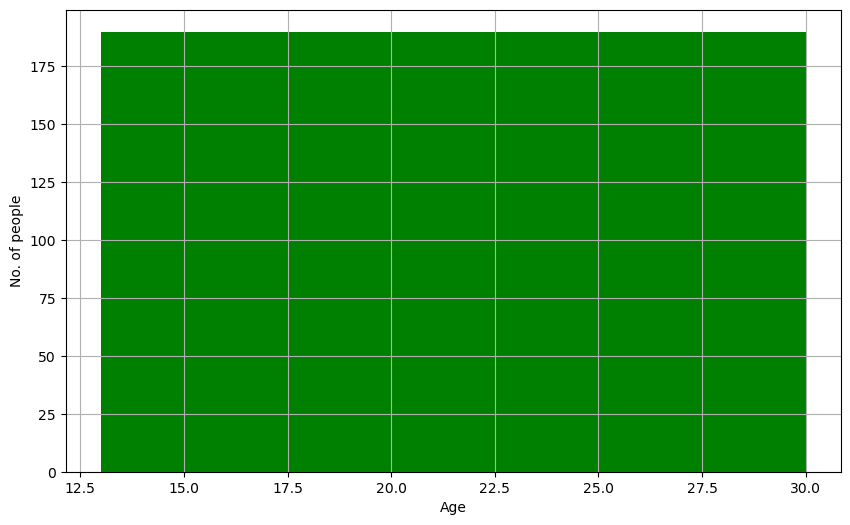

In [9]:

df = ages.to_frame(name="age")

df['age'].hist(bins=df['age'].nunique(),color='g',figsize=(10,6))  

# Pretty obvious that a large chunk of population in training data is from 20 to 60. Sort of bell-shaped curve (Gaussian Distribution)-   very non uniform

plt.xlabel('Age')
plt.ylabel('No. of people')
plt.show()

In [10]:

classes = []
for i in ages:
      i = int(i)
         
      if (i>=13) and (i<=17):
          classes.append(0)      
      if (i>=18) and (i<=25):
          classes.append(1)       
      if (i>=26) and (i<=30):
          classes.append(2)
     
     
            
            
            
classes[:3]

print(len(classes))

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

3420


(3420, 3)

In [11]:
agelabel=np.array(ages)

type(agelabel)

numpy.ndarray

In [12]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255


C:\Users\CyberOps\AppData\Local\Temp\ipykernel_29452\3179156042.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [13]:

imagesize =X.shape[1]
X.shape 

(3420, 224, 224, 3)

In [14]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_reg, y_test_reg, y_train_class, y_test_class  = train_test_split(X, agelabel,categorical_labels, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val_reg, y_test_reg,y_val_class, y_test_class= train_test_split(x_test, y_test_reg, y_test_class,test_size=test_ratio/(test_ratio + validation_ratio)) 

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_reg.shape, "validation Label Size",y_val_reg.shape, "Testing Image Size",y_test_reg.shape)
print("Training Label Size",y_train_class.shape, "validation Label Size",y_val_class.shape, "Testing Image Size",y_test_class.shape)


Training Image Size (2393, 224, 224, 3)  Validation Image Size (684, 224, 224, 3) Testing Image Size  (343, 224, 224, 3)
Training Label Size (2393,) validation Label Size (684,) Testing Image Size (343,)
Training Label Size (2393, 3) validation Label Size (684, 3) Testing Image Size (343, 3)


In [15]:

inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)
model= Flatten()(model)
model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)
model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)
model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)
model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)
reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)
cla_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)
age_net = Model(inputs=inputs, outputs=[reg_cnn, cla_cnn])
age_net.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [17]:
X.shape

(3420, 224, 224, 3)

In [12]:

agelabel=images.Age
y_class = LabelEncoder().fit_transform(agelabel)
n_class = len(unique(y_class))
y_class[20]

5

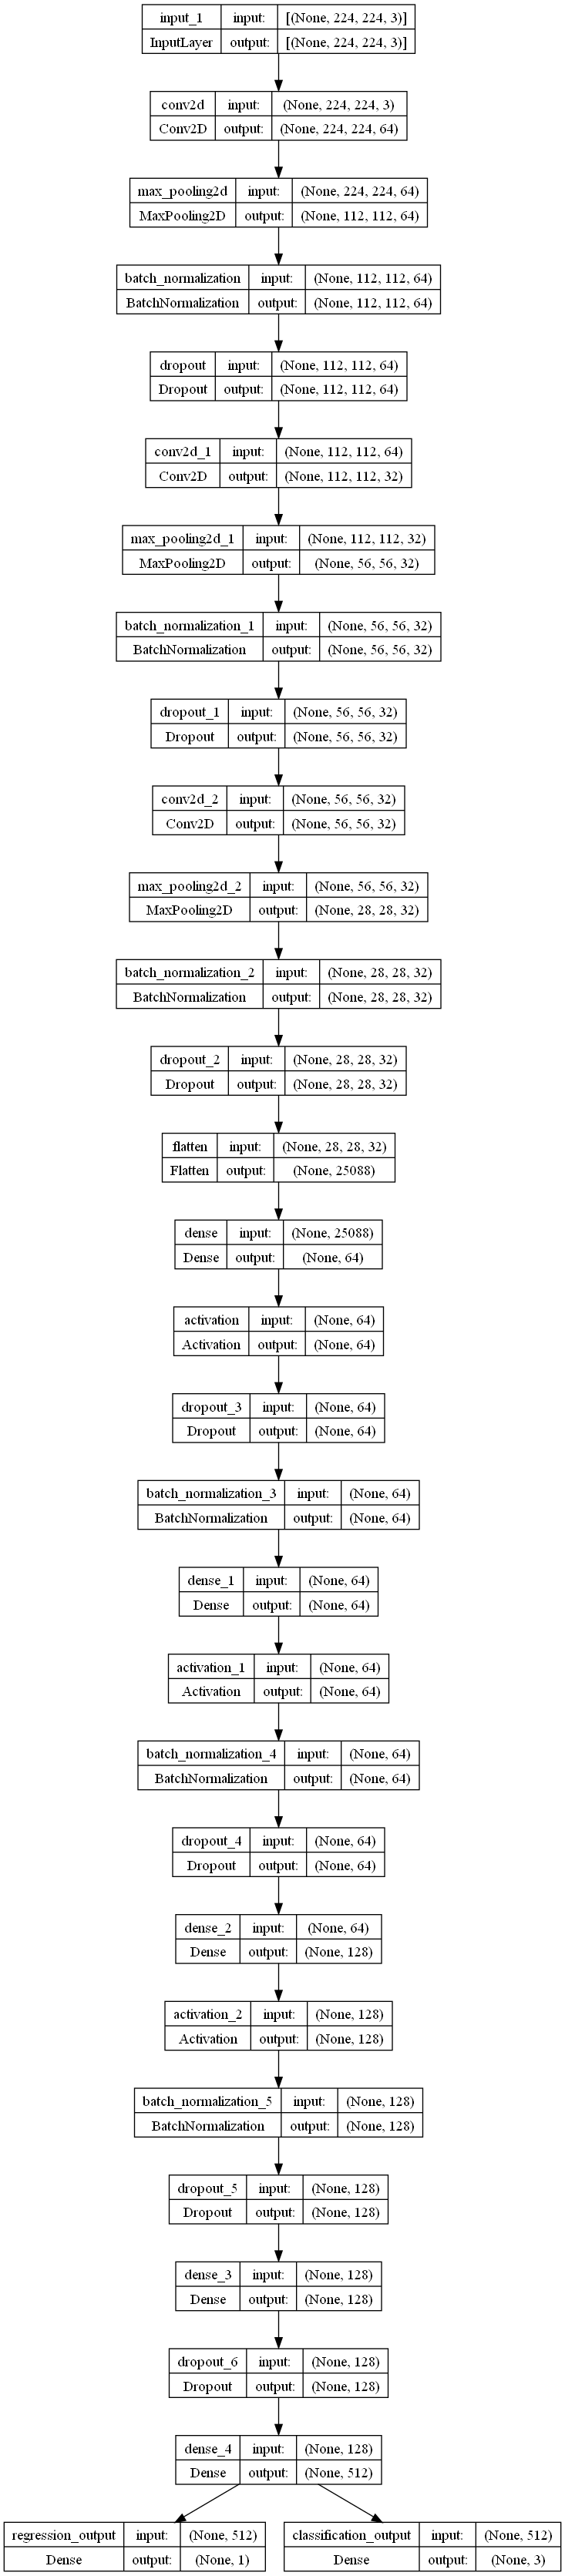

In [15]:
plot_model(age_net, to_file='/model/model.png', show_shapes=True)

In [13]:

from keras.models import load_model
age_net=load_model('../model/afrinet-cnn-comb.h5')




n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet.h5', verbose=1, save_best_only=True)

  model_history=age_net.fit(x_train, [y_train_reg,y_train_class],validation_data=(x_val,[y_val_reg,y_val_class]), epochs=50, batch_size=32,verbose=2,callbacks=[early_stopping, model_checkpoint],shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.34533, saving model to /model\agenet.h5
75/75 - 78s - loss: 3.0328 - regression_output_loss: 2.7697 - classification_output_loss: 0.2632 - regression_output_mae: 1.1746 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0989 - classification_output_accuracy: 0.9051 - val_loss: 1.3453 - val_regression_output_loss: 1.1927 - val_classification_output_loss: 0.1526 - val_regression_output_mae: 0.7679 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0677 - val_classification_output_accuracy: 0.9474 - 78s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 1.34533
75/75 - 87s - loss: 2.9775 - regression_output_loss: 2.6887 - classification_output_loss: 0.2888 - regression_output_mae: 1.1594 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.1040 - classification_output_accuracy: 0.8930 - val_loss: 1.5773 - val_regression_output_loss: 1.4026 - val_classif

Epoch 9/50

Epoch 9: val_loss did not improve from 1.40613
75/75 - 109s - loss: 2.7140 - regression_output_loss: 2.4572 - classification_output_loss: 0.2568 - regression_output_mae: 1.1129 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0935 - classification_output_accuracy: 0.9093 - val_loss: 1.7104 - val_regression_output_loss: 1.5199 - val_classification_output_loss: 0.1904 - val_regression_output_mae: 0.8169 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0796 - val_classification_output_accuracy: 0.9386 - 109s/epoch - 1s/step
Training on Fold:  2




Epoch 1/50

Epoch 1: val_loss improved from inf to 1.61102, saving model to /model\agenet.h5
75/75 - 112s - loss: 2.7170 - regression_output_loss: 2.4539 - classification_output_loss: 0.2631 - regression_output_mae: 1.1033 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0968 - classification_output_accuracy: 0.8985 - val_loss: 1.6110 - val_regression_outpu

Epoch 2/50

Epoch 2: val_loss did not improve from 1.52699
75/75 - 106s - loss: 2.5797 - regression_output_loss: 2.3198 - classification_output_loss: 0.2598 - regression_output_mae: 1.0808 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0929 - classification_output_accuracy: 0.9056 - val_loss: 1.7662 - val_regression_output_loss: 1.6031 - val_classification_output_loss: 0.1631 - val_regression_output_mae: 0.8574 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0761 - val_classification_output_accuracy: 0.9547 - 106s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 1.52699
75/75 - 123s - loss: 2.6954 - regression_output_loss: 2.4336 - classification_output_loss: 0.2618 - regression_output_mae: 1.0757 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0932 - classification_output_accuracy: 0.9081 - val_loss: 1.6622 - val_regression_output_loss: 1.4989 - val_classification_output_loss: 0.1632 - v

Epoch 16/50

Epoch 16: val_loss did not improve from 1.25645
75/75 - 105s - loss: 2.1903 - regression_output_loss: 1.9804 - classification_output_loss: 0.2100 - regression_output_mae: 0.9887 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0767 - classification_output_accuracy: 0.9260 - val_loss: 1.5539 - val_regression_output_loss: 1.3857 - val_classification_output_loss: 0.1683 - val_regression_output_mae: 0.8583 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0723 - val_classification_output_accuracy: 0.9561 - 105s/epoch - 1s/step
Epoch 17/50

Epoch 17: val_loss did not improve from 1.25645
75/75 - 103s - loss: 2.1630 - regression_output_loss: 1.9389 - classification_output_loss: 0.2241 - regression_output_mae: 0.9721 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0784 - classification_output_accuracy: 0.9227 - val_loss: 1.4029 - val_regression_output_loss: 1.1958 - val_classification_output_loss: 0.2071

Epoch 2/50

Epoch 2: val_loss did not improve from 1.41571
75/75 - 104s - loss: 2.2929 - regression_output_loss: 2.0786 - classification_output_loss: 0.2143 - regression_output_mae: 0.9982 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0767 - classification_output_accuracy: 0.9248 - val_loss: 3.7408 - val_regression_output_loss: 3.5000 - val_classification_output_loss: 0.2408 - val_regression_output_mae: 1.0728 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0734 - val_classification_output_accuracy: 0.9415 - 104s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 1.41571
75/75 - 104s - loss: 2.3022 - regression_output_loss: 2.0755 - classification_output_loss: 0.2267 - regression_output_mae: 1.0199 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0800 - classification_output_accuracy: 0.9143 - val_loss: 1.7747 - val_regression_output_loss: 1.6029 - val_classification_output_loss: 0.1718 - v

75/75 - 105s - loss: 2.2350 - regression_output_loss: 2.0000 - classification_output_loss: 0.2350 - regression_output_mae: 1.0076 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0842 - classification_output_accuracy: 0.9114 - val_loss: 1.4993 - val_regression_output_loss: 1.3480 - val_classification_output_loss: 0.1513 - val_regression_output_mae: 0.7987 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0605 - val_classification_output_accuracy: 0.9503 - 105s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 1.49934 to 1.40348, saving model to /model\agenet.h5
75/75 - 105s - loss: 2.2269 - regression_output_loss: 2.0150 - classification_output_loss: 0.2119 - regression_output_mae: 0.9902 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0769 - classification_output_accuracy: 0.9206 - val_loss: 1.4035 - val_regression_output_loss: 1.2612 - val_classification_output_loss: 0.1422 - val_regression_output_

Epoch 6/50

Epoch 6: val_loss did not improve from 1.27340
75/75 - 104s - loss: 2.9556 - regression_output_loss: 2.7004 - classification_output_loss: 0.2552 - regression_output_mae: 1.1465 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0881 - classification_output_accuracy: 0.9068 - val_loss: 4.8982 - val_regression_output_loss: 4.5837 - val_classification_output_loss: 0.3145 - val_regression_output_mae: 1.2771 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0971 - val_classification_output_accuracy: 0.9181 - 104s/epoch - 1s/step
Training on Fold:  9




Epoch 1/50

Epoch 1: val_loss improved from inf to 1.93325, saving model to /model\agenet.h5
75/75 - 104s - loss: 1.9366 - regression_output_loss: 1.7095 - classification_output_loss: 0.2271 - regression_output_mae: 0.9503 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0760 - classification_output_accuracy: 0.9227 - val_loss: 1.9332 - val_regression_outpu

Training on Fold:  10






11/11 [==============================] - 4s 271ms/step
The MSE 0.9664224154115663
The MAE 0.6427430745116476
this is the rmse 0.9830678590064708
Test R^2 Score: 0.96292
[[ 89   4   0]
 [  2 148   7]
 [  1   1  91]]
(343, 3)


<AxesSubplot:>

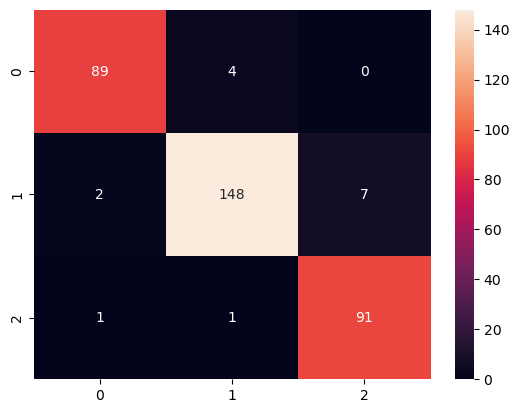

In [14]:
yhat1, yhat2 = age_net.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat1)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat1)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat1)
print("Test R^2 Score: {:.5f}".format(r2))




y_pred=np.argmax(yhat2, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat2.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)


In [15]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat2, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        93
           1       0.97      0.94      0.95       157
           2       0.93      0.98      0.95        93

    accuracy                           0.96       343
   macro avg       0.95      0.96      0.96       343
weighted avg       0.96      0.96      0.96       343



In [16]:

xscore = age_net.evaluate(x_test, y_test_class, verbose = 0) 

print('Test loss:', xscore[5]) 
print('Test accuracy:', xscore[6])



Test loss: 0.05823986604809761
Test accuracy: 0.9562682509422302


KeyError: 'regression_output_mae'

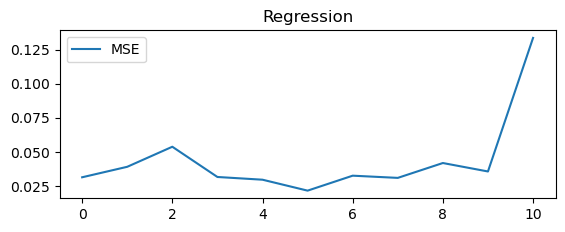

In [37]:
# plot loss during training
plt.title('Regression testing')
plt.subplot(211)
plt.title('Regression')
plt.plot(model_history.history['loss'], label='MSE')
#plt.plot(model_history.history[' regression_output_mae'], label='MAE')
plt.legend()
# plot loss during training
plt.subplot(211)

plt.plot(model_history.history['regression_output_mae'], label='MAE')
#plt.plot(model_history.history['val_regression_output_mae'], label='MAE')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title(' Training Classfication Accuracy')
plt.plot(model_history.history['classification_output_loss'], label='Loss')
plt.plot(model_history.history['classification_output_accuracy'], label='Accuracy')
plt.legend()
plt.show()

# plot accuracy testing 
plt.subplot(212)
plt.title('Tessting Classfication Accuracy')
plt.plot(model_history.history['val_classification_output_loss'], label='Loss')
plt.plot(model_history.history['val_classification_output_accuracy'], label='Accuracy')
plt.legend()
plt.show()


plt.subplot(212)
plt.title('Tessting Vs Training Classfication Accuracy')
plt.plot(model_history.history['val_classification_output_accuracy'], label='Val Accuracy')
plt.plot(model_history.history['classification_output_accuracy'], label='Accuracy')

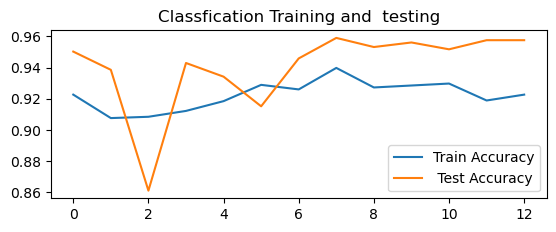

In [18]:

# plot accuracy testing 
plt.subplot(212)
plt.title('Classfication Training and  testing')
plt.plot(model_history.history['classification_output_accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_classification_output_accuracy'], label=' Test Accuracy')
plt.legend()
plt.show()


In [72]:
age_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [23]:
inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)


model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)


model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)



model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)



age_net_reg = Model(inputs=inputs, outputs=reg_cnn)



age_net_reg.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 112, 112, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      8224

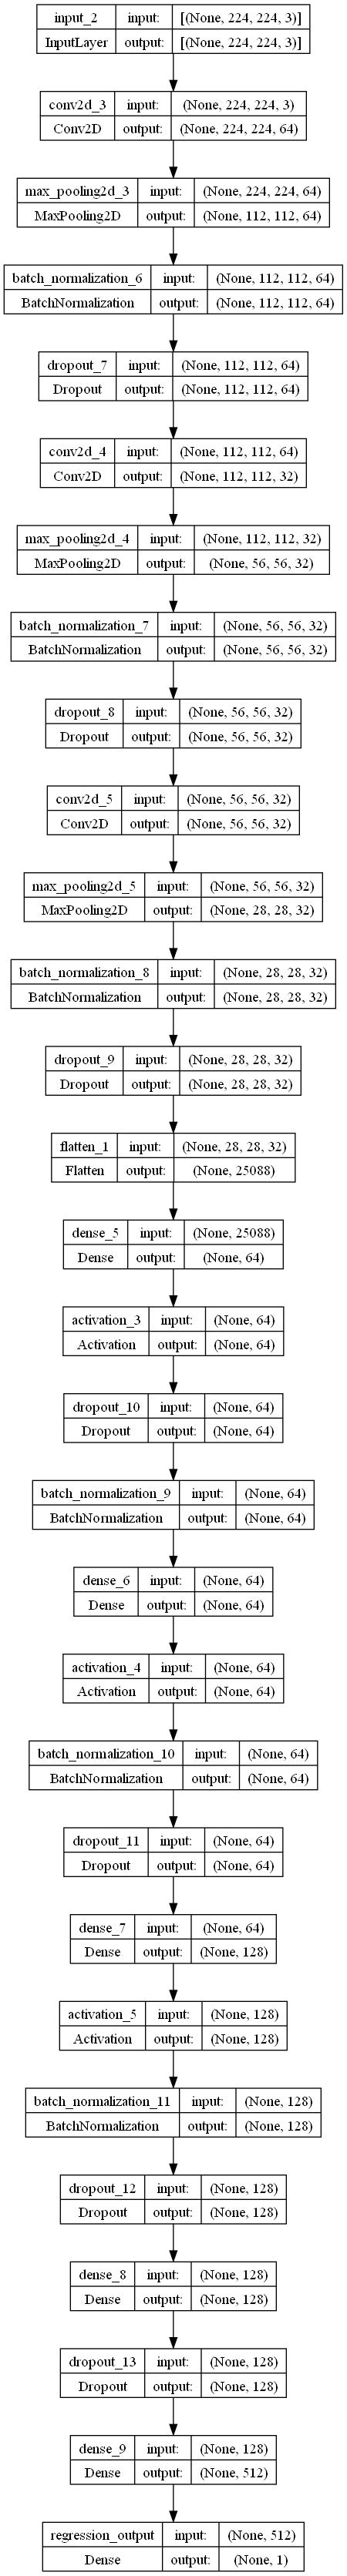

In [24]:
plot_model(age_net_reg, to_file='/model/age_net_reg.png', show_shapes=True)


In [20]:

from keras.models import load_model
age_net_reg=load_model('../model/afri-cnn-regression-30')





n_folds=10



#save the model history in a list after fitting so that we can plot leter
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet_reg.h5', verbose=1, save_best_only=True)
  model_history=age_net_reg.fit(x_train, y_train_reg, epochs=50, batch_size=32, verbose=2,callbacks=[early_stopping,model_checkpoint],validation_data=(x_val,y_val_reg) ,shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.34899, saving model to /model\agenet_reg.h5
75/75 - 83s - loss: 1.4168 - mae: 0.6836 - val_loss: 1.3490 - val_mae: 0.6623 - 83s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 1.34899 to 0.92116, saving model to /model\agenet_reg.h5
75/75 - 85s - loss: 1.2860 - mae: 0.6765 - val_loss: 0.9212 - val_mae: 0.5479 - 85s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.92116
75/75 - 98s - loss: 0.9461 - mae: 0.5971 - val_loss: 1.1032 - val_mae: 0.5500 - 98s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.92116 to 0.68480, saving model to /model\agenet_reg.h5
75/75 - 96s - loss: 1.0594 - mae: 0.6212 - val_loss: 0.6848 - val_mae: 0.4981 - 96s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.68480
75/75 - 111s - loss: 1.0713 - mae: 0.6422 - val_loss: 1.3670 - val_mae: 0.6157 - 111s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 0.68480
75/75 - 113s - loss: 1

75/75 - 136s - loss: 0.8315 - mae: 0.5854 - val_loss: 0.5011 - val_mae: 0.4655 - 136s/epoch - 2s/step
Epoch 9/50

Epoch 9: val_loss did not improve from 0.50114
75/75 - 144s - loss: 0.7244 - mae: 0.5651 - val_loss: 0.5689 - val_mae: 0.5003 - 144s/epoch - 2s/step
Epoch 10/50

Epoch 10: val_loss did not improve from 0.50114
75/75 - 139s - loss: 0.6880 - mae: 0.5613 - val_loss: 0.7957 - val_mae: 0.5472 - 139s/epoch - 2s/step
Epoch 11/50

Epoch 11: val_loss did not improve from 0.50114
75/75 - 139s - loss: 0.7088 - mae: 0.5794 - val_loss: 1.1040 - val_mae: 0.6041 - 139s/epoch - 2s/step
Epoch 12/50

Epoch 12: val_loss did not improve from 0.50114
75/75 - 139s - loss: 0.6036 - mae: 0.5367 - val_loss: 1.1118 - val_mae: 0.6282 - 139s/epoch - 2s/step
Epoch 13/50

Epoch 13: val_loss did not improve from 0.50114
75/75 - 140s - loss: 0.9276 - mae: 0.6063 - val_loss: 1.8208 - val_mae: 0.6777 - 140s/epoch - 2s/step
Training on Fold:  4




Epoch 1/50

Epoch 1: val_loss improved from inf to 0.80988, 

Epoch 6/50

Epoch 6: val_loss did not improve from 0.73343
75/75 - 105s - loss: 0.7138 - mae: 0.5478 - val_loss: 1.3490 - val_mae: 0.6729 - 105s/epoch - 1s/step
Epoch 7/50

Epoch 7: val_loss improved from 0.73343 to 0.71132, saving model to /model\agenet_reg.h5
75/75 - 104s - loss: 0.6719 - mae: 0.5621 - val_loss: 0.7113 - val_mae: 0.5380 - 104s/epoch - 1s/step
Epoch 8/50

Epoch 8: val_loss improved from 0.71132 to 0.67410, saving model to /model\agenet_reg.h5
75/75 - 103s - loss: 0.6500 - mae: 0.5512 - val_loss: 0.6741 - val_mae: 0.5450 - 103s/epoch - 1s/step
Epoch 9/50

Epoch 9: val_loss improved from 0.67410 to 0.65247, saving model to /model\agenet_reg.h5
75/75 - 104s - loss: 0.7028 - mae: 0.5497 - val_loss: 0.6525 - val_mae: 0.5128 - 104s/epoch - 1s/step
Epoch 10/50

Epoch 10: val_loss did not improve from 0.65247
75/75 - 105s - loss: 0.7996 - mae: 0.5574 - val_loss: 1.1239 - val_mae: 0.6778 - 105s/epoch - 1s/step
Epoch 11/50

Epoch 11: val_loss improved from 0.65247 to 0.59986, s

In [21]:
yhat = age_net_reg.predict(x_test)
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net_reg.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat)
print("Test R^2 Score: {:.5f}".format(r2))


yhat.shape

11/11 [==============================] - 5s 217ms/step
The MSE 0.6917056257219958
The MAE 0.4731131044838241
this is the rmse 0.8316884186532814
Test R^2 Score: 0.97346


(343, 1)

INFO:tensorflow:Assets written to: ../model/afrinet-cnn-comb\assets


INFO:tensorflow:Assets written to: ../model/afrinet-cnn-comb\assets


INFO:tensorflow:Assets written to: ../model/afrinet-cnn-reg\assets


INFO:tensorflow:Assets written to: ../model/afrinet-cnn-reg\assets


INFO:tensorflow:Assets written to: ../model/afrinet-cnn-clas\assets


INFO:tensorflow:Assets written to: ../model/afrinet-cnn-clas\assets


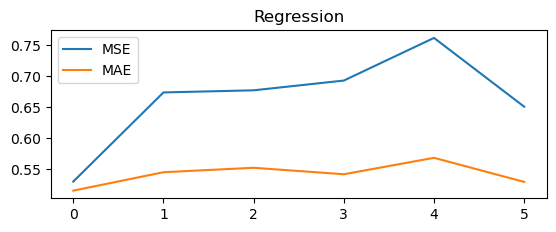

In [22]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Regression')
plt.plot(model_history.history['loss'], label='MSE')
plt.plot(model_history.history['mae'], label='MAE')
plt.legend()
# plot accuracy during training

In [31]:
inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model  = BatchNormalization()(model)
model = Dropout(0.3)(model)


model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model  = BatchNormalization()(model)
model = Dropout(0.30)(model)


model  = Dense(128)(model)
model = Activation("relu")(model)
model  = BatchNormalization()(model)
model  = Dropout(0.20)(model)



model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


class_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)



age_net_class = Model(inputs=inputs, outputs=class_cnn)



age_net_class.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 112, 112, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_28 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      8224

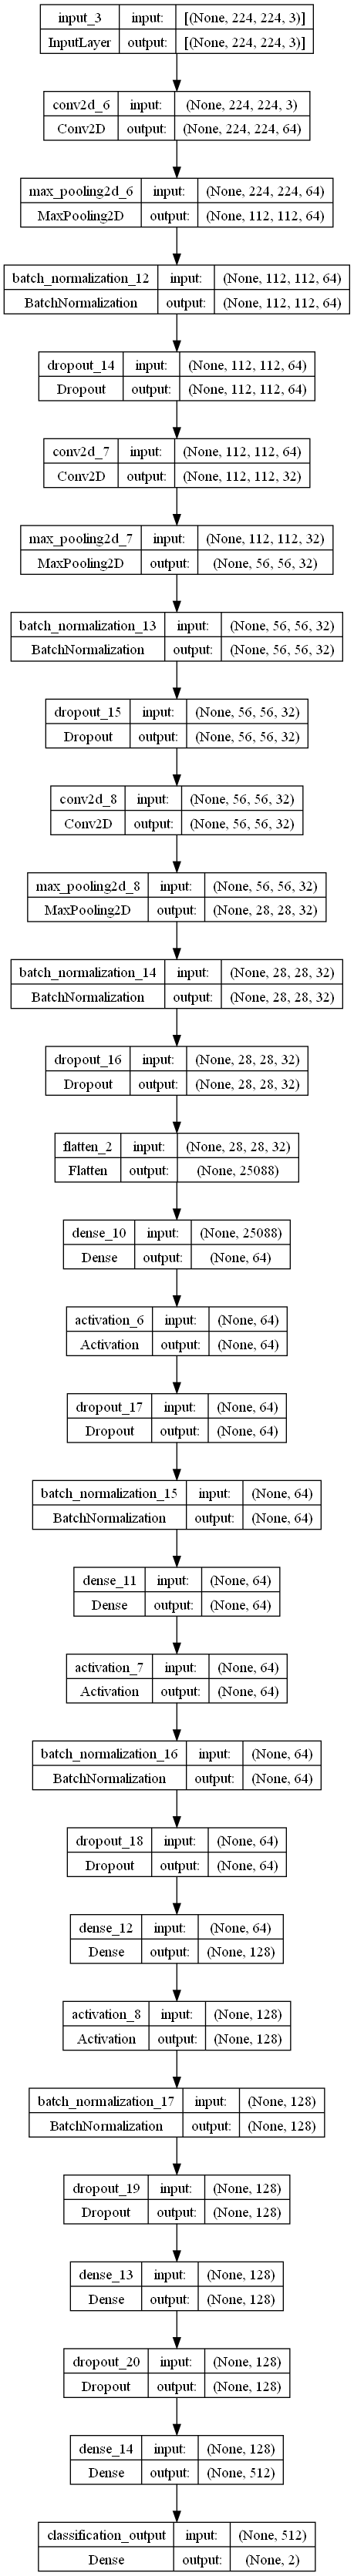

In [28]:
plot_model(age_net_class, to_file='/model/age_net_class.png', show_shapes=True)

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

age_net_class.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=["accuracy"])


In [23]:
age_net_class=load_model('../model/afrinet-cnn-class.h5')



n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet_class.h5', verbose=1, save_best_only=True)
  model_history=age_net_class.fit(x_train, y_train_class, epochs=50, batch_size=32, verbose=2,callbacks=[early_stopping,model_checkpoint],validation_data=(x_val,y_val_class), shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.10015, saving model to /model\agenet_class.h5
75/75 - 109s - loss: 0.0681 - accuracy: 0.9620 - val_loss: 0.1001 - val_accuracy: 0.9518 - 109s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss improved from 0.10015 to 0.03535, saving model to /model\agenet_class.h5
75/75 - 105s - loss: 0.0608 - accuracy: 0.9733 - val_loss: 0.0353 - val_accuracy: 0.9839 - 105s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss improved from 0.03535 to 0.03435, saving model to /model\agenet_class.h5
75/75 - 103s - loss: 0.0600 - accuracy: 0.9712 - val_loss: 0.0343 - val_accuracy: 0.9839 - 103s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.03435 to 0.03109, saving model to /model\agenet_class.h5
75/75 - 104s - loss: 0.0580 - accuracy: 0.9699 - val_loss: 0.0311 - val_accuracy: 0.9898 - 104s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.03109
75/75 - 103s - loss: 0.0746 - accuracy: 0.9645 - val_loss: 0.0344 - val_accuracy: 0.9

75/75 - 103s - loss: 0.0445 - accuracy: 0.9787 - val_loss: 0.0428 - val_accuracy: 0.9795 - 103s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 0.01783
75/75 - 104s - loss: 0.0337 - accuracy: 0.9820 - val_loss: 0.0299 - val_accuracy: 0.9825 - 104s/epoch - 1s/step
Training on Fold:  5




Epoch 1/50

Epoch 1: val_loss improved from inf to 0.02689, saving model to /model\agenet_class.h5
75/75 - 105s - loss: 0.0384 - accuracy: 0.9816 - val_loss: 0.0269 - val_accuracy: 0.9839 - 105s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.02689
75/75 - 103s - loss: 0.0449 - accuracy: 0.9804 - val_loss: 0.0366 - val_accuracy: 0.9839 - 103s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.02689
75/75 - 104s - loss: 0.0663 - accuracy: 0.9699 - val_loss: 0.5011 - val_accuracy: 0.6901 - 104s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.02689
75/75 - 106s - loss: 0.0751 - accuracy: 0.9603 - val_loss: 0.0537 - val_accuracy

75/75 - 105s - loss: 0.0539 - accuracy: 0.9779 - val_loss: 0.0497 - val_accuracy: 0.9708 - 105s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.02208
75/75 - 104s - loss: 0.0318 - accuracy: 0.9845 - val_loss: 0.0290 - val_accuracy: 0.9883 - 104s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.02208
75/75 - 104s - loss: 0.0299 - accuracy: 0.9850 - val_loss: 0.0291 - val_accuracy: 0.9883 - 104s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss improved from 0.02208 to 0.02205, saving model to /model\agenet_class.h5
75/75 - 104s - loss: 0.0219 - accuracy: 0.9916 - val_loss: 0.0220 - val_accuracy: 0.9868 - 104s/epoch - 1s/step
Epoch 7/50

Epoch 7: val_loss did not improve from 0.02205
75/75 - 104s - loss: 0.0328 - accuracy: 0.9866 - val_loss: 0.0431 - val_accuracy: 0.9868 - 104s/epoch - 1s/step
Epoch 8/50

Epoch 8: val_loss did not improve from 0.02205
75/75 - 103s - loss: 0.0312 - accuracy: 0.9833 - val_loss: 0.0758 - val_accuracy: 0.9532 - 103s/epoch

98.0  %
11/11 [==============================] - 5s 219ms/step
[[ 91   1   1]
 [  1 154   2]
 [  1   0  92]]
(343, 3)


<AxesSubplot:>

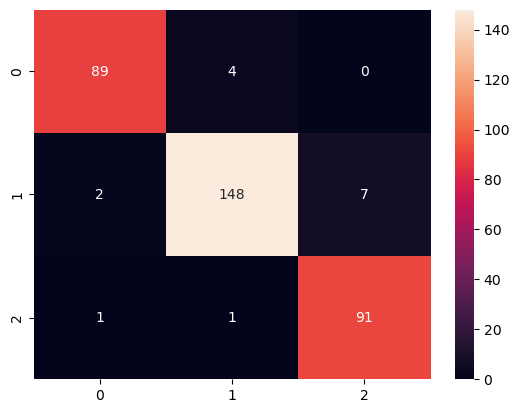

In [24]:
xscore = age_net_class.evaluate(x_test, y_test_class, verbose=0)
xscore=round(xscore[1],2)
# Print test accuracy
print(xscore * 100," %")


yhat = age_net_class.predict(x_test)
true_ages=y_test_class

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages, axis=1)
cm_class = confusion_matrix(y_test, y_pred)
print(cm_class)
print(yhat2.shape)
import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)





<Axes: >

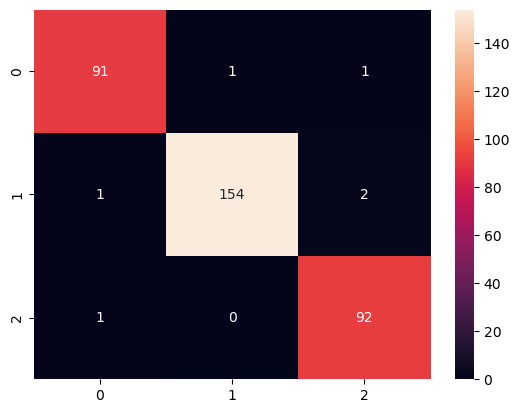

In [6]:
import numpy as np
cm_mat=[[91,1,1],[1,154,2],[1,0,92]]

cm_mat= np.array(cm_mat)
cm_mat.shape

cm_mat

import seaborn as sns
sns.heatmap(cm_mat, fmt="d", annot=True)


In [25]:
import sklearn

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.99      0.98      0.99       157
           2       0.97      0.99      0.98        93

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



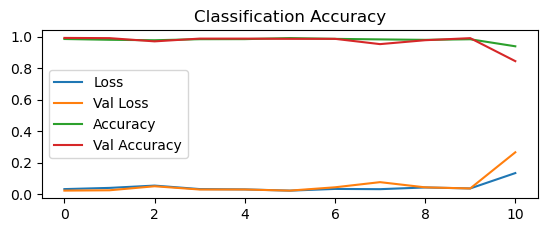

In [26]:
# plot loss during training
plt.subplot(211)
plt.title('Classification Loss')
plt.plot(model_history.history['loss'], label='Loss')
plt.plot(model_history.history['val_loss'], label='Val Loss')
plt.legend()

plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(model_history.history['accuracy'], label='Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
# plot accuracy during training

In [15]:
labels =[
    "(13-17)",# index 0
    "(18-25)" ,# index 1
        "(26-30)"# index 2     
        ]

In [22]:
from keras.models import load_model
agenet_class=load_model('../model/afrinet-cnn-class.h5',compile=False)
agenet= load_model('../model/afrinet-cnn-comb.h5',compile=False)
agenet_reg = load_model('../model/afrinet-cnn-reg.h5', compile=False) #loading pre-savedd mod

# Classification model

11/11 [==============================] - 5s 222ms/step


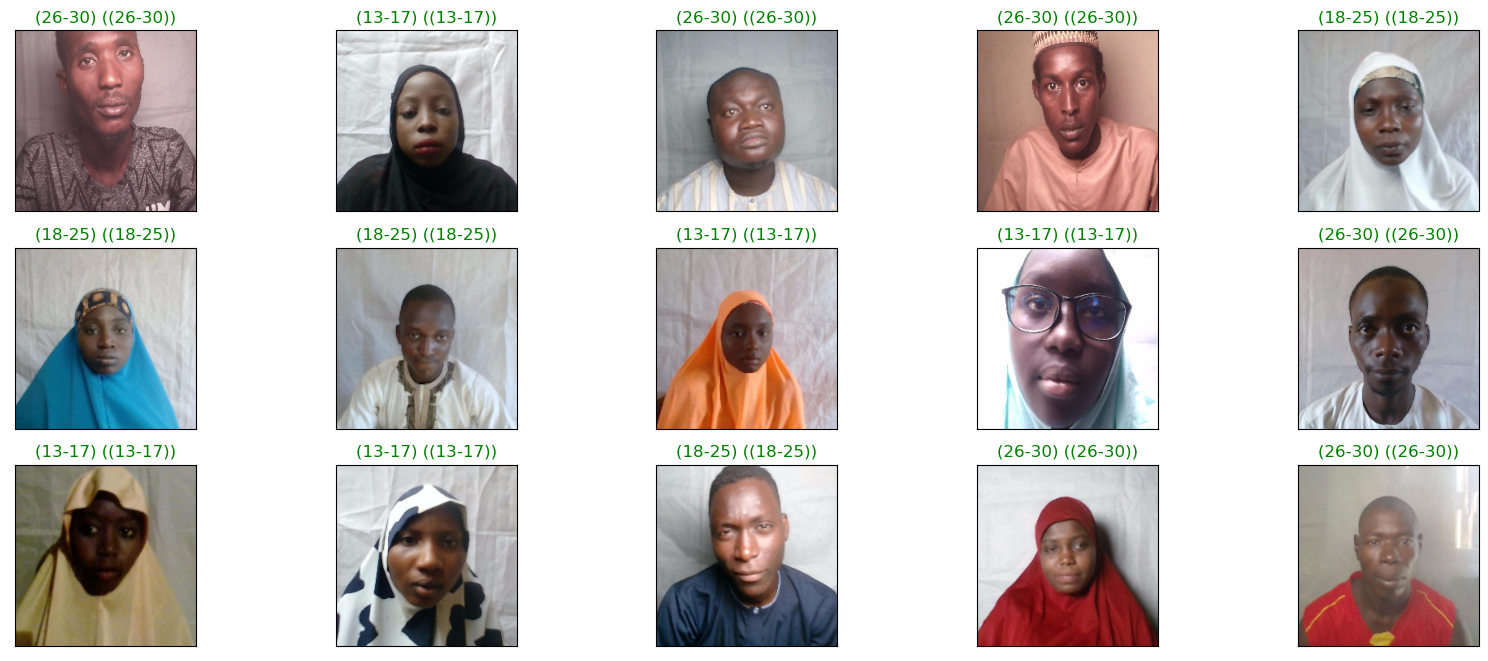

In [28]:
#CLASSIFICATION MODEL OUTPUT (98%)


y_hat = age_net_class.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

# Prediction Model

11/11 [==============================] - 15s 634ms/step


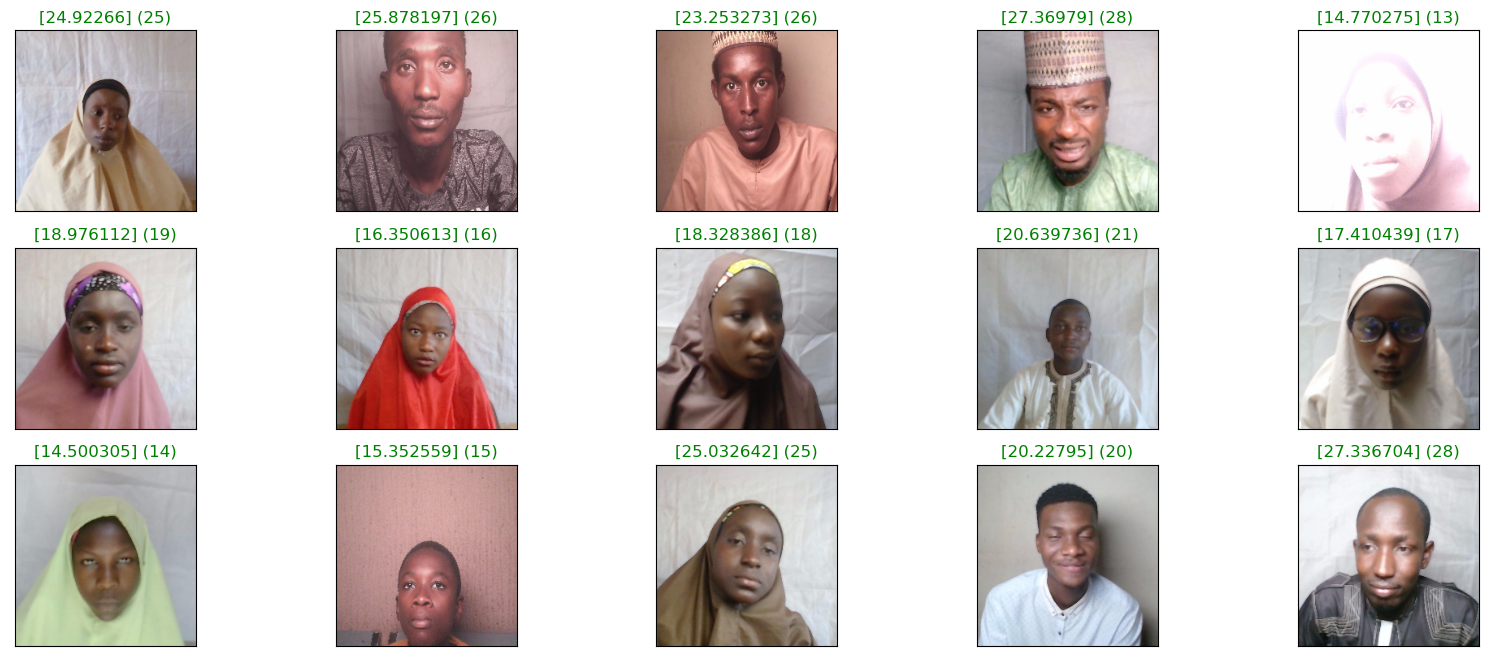

In [36]:
#PREDICTION MODEL ON TESTDATA (REGRESSION OUTPUT)

y_hat = age_net_reg.predict(x_test)


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_reg[index]

    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()

# Combined Model

11/11 [==============================] - 5s 227ms/step


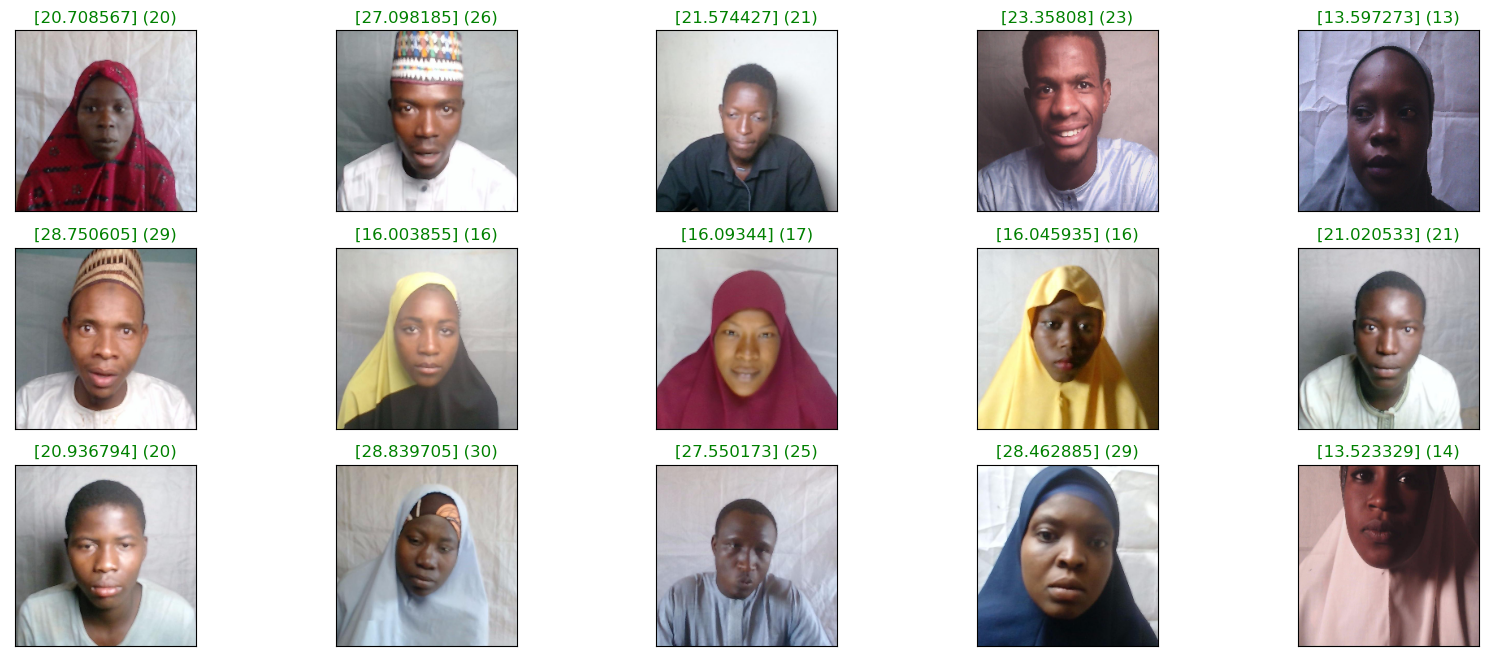

In [30]:
#combined Agenet




prediction,classification = age_net.predict(x_test)






# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = prediction[index]
    true_index = y_test_reg[index]
  # Set the title for each image
    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()

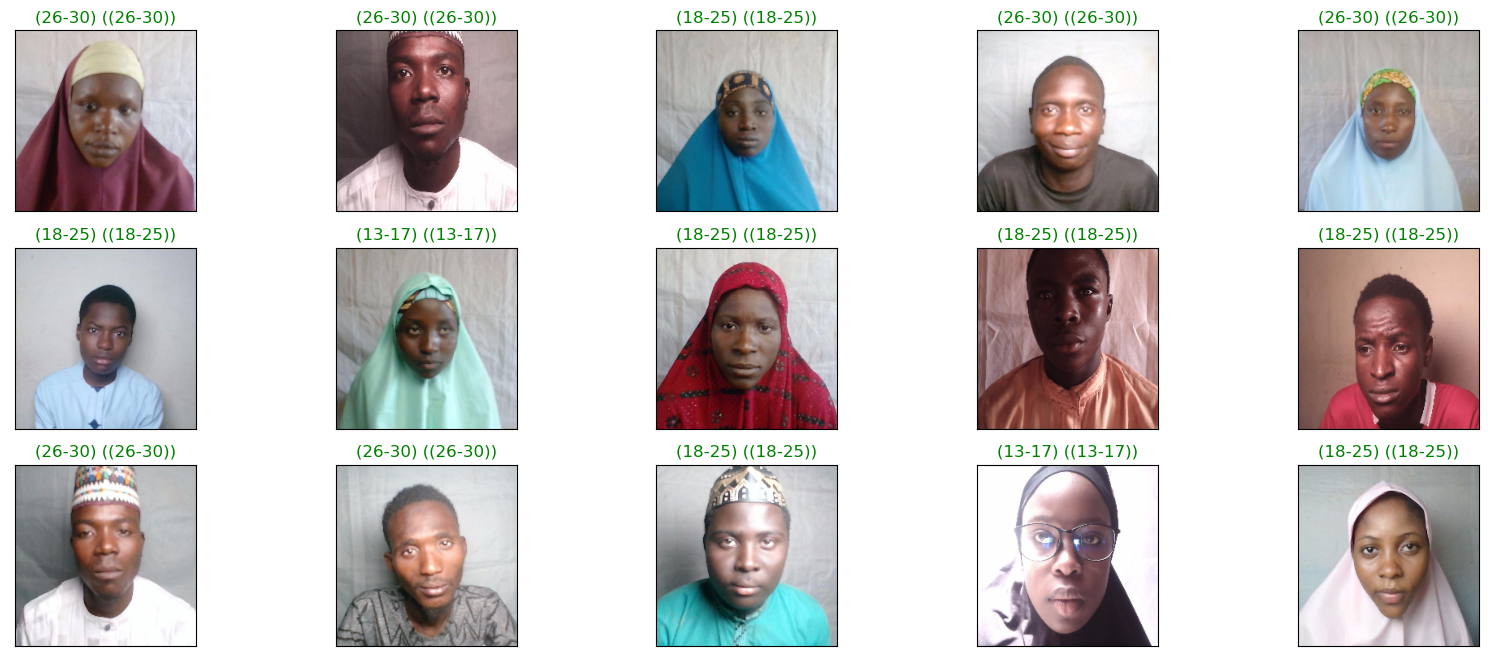

In [31]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(classification[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [32]:
age_net_reg.save('../model/afrinet-cnn-reg.h5', include_optimizer=True)



In [33]:
age_net_class.save('../model/afrinet-cnn-class.h5', include_optimizer=True)

In [34]:
age_net.save('../model/afrinet-cnn-comb.h5', include_optimizer=True)
age_net_reg.save('../model/afrinet-cnn-reg.h5', include_optimizer=True)
age_net_class.save('../model/afrinet-cnn-class.h5', include_optimizer=True)

In [35]:
age_net.save('../model/afrinet-cnn-comb.h5', include_optimizer=True)

In [23]:
y_hat =agenet_reg.predict(x_test)

11/11 [==============================] - 3s 212ms/step


In [27]:
true_ages=y_test_reg

from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,y_hat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,y_hat)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

r2 = r2_score(true_ages, y_hat)
print("Test R^2 Score: {:.5f}".format(r2))


y_hat.shape

The MSE 0.4504401132775424
The MAE 0.443450941636333
this is the rmse 0.67114835414947
Test R^2 Score: 0.98235


(343, 1)

<AxesSubplot:>

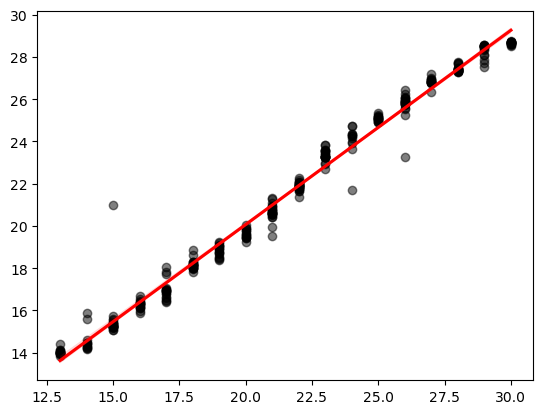

In [33]:
import seaborn as sns

sns.regplot(x = true_ages, y = y_hat,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level

In [35]:
prediction,classification = agenet.predict(x_test)

11/11 [==============================] - 2s 190ms/step


In [36]:
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,prediction)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,prediction)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

r2 = r2_score(true_ages, prediction)
print("Test R^2 Score: {:.5f}".format(r2))


prediction.shape

The MSE 0.7484451767093496
The MAE 0.5975042181876936
this is the rmse 0.865127260412796
Test R^2 Score: 0.97068


(343, 1)

<AxesSubplot:>

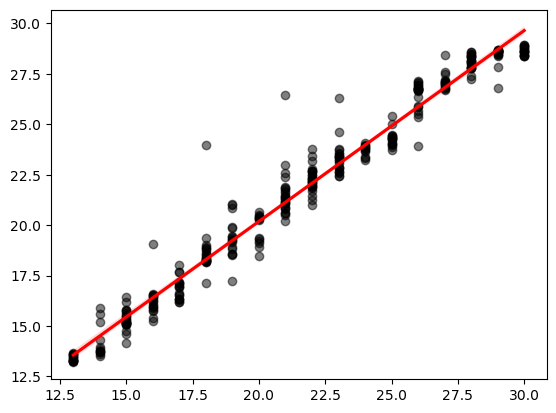

In [38]:

import seaborn as sns

sns.regplot(x = true_ages, y = prediction,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # 99% level